<a href="https://colab.research.google.com/github/akcakayakubra/MTH/blob/main/MTH410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/csv files for mth410")

In [ ]:
import pandas as pd

df = pd.read_csv("03-02-2018.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
df.head(10)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5,443,6,02/03/2018 08:47:41,250,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6,80,6,02/03/2018 08:47:41,5964033,3,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7,49690,6,02/03/2018 08:47:46,144,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
8,443,6,02/03/2018 08:48:17,90828,8,8,1748,3898.0,1078,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
9,443,6,02/03/2018 08:48:17,152,3,0,31,0.0,31,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


Data Preprocessing

In [ ]:
df.shape

(1048575, 80)

In [ ]:
#Get unique values in Label column
df.loc[:,'Label'].unique()

array(['Benign', 'Bot'], dtype=object)

In [ ]:
#Find the columns containing missing value

missing_values = df.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0].index

print("Columns with missing values:")
for column in columns_with_missing_values:
    print(column)


Columns with missing values:
Flow Byts/s


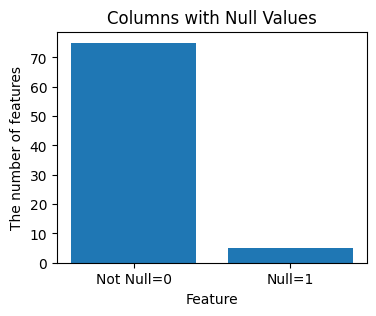

In [ ]:
#Plot the columns containing null values
zero_counts = (df == 0).sum()

plt.figure(figsize=(4, 3))
plt.bar(['Not Null=0', 'Null=1'], [zero_counts[zero_counts > 0].count(), zero_counts[zero_counts == 0].count()])
plt.xlabel('Feature')
plt.ylabel('The number of features')
plt.title('Columns with Null Values')
plt.show()

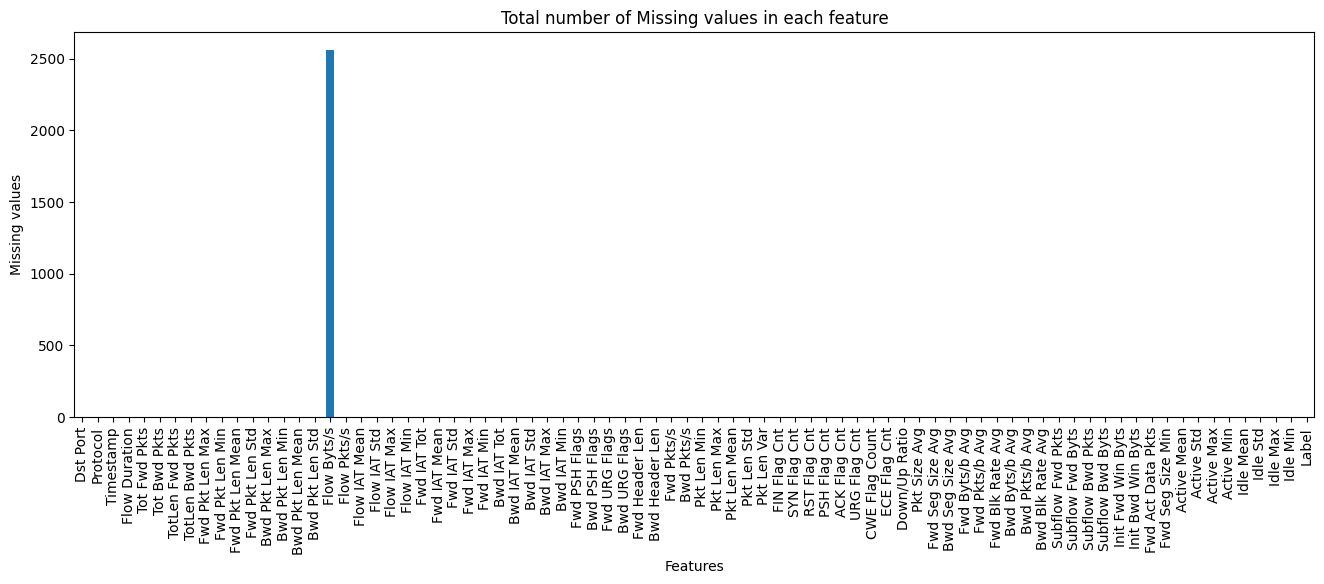

In [ ]:
#Plot missing values in each column
def plotMissingValues(dataframe):
  missing_values = dataframe.isnull().sum()
  fig = plt.figure(figsize=(16,5))
  missing_values.plot(kind='bar')
  plt.xlabel("Features")
  plt.ylabel("Missing values")
  plt.title("Total number of Missing values in each feature")
  plt.show()

plotMissingValues(df)

In [ ]:
#Rows wilth null values are removed

data_f = df.dropna()

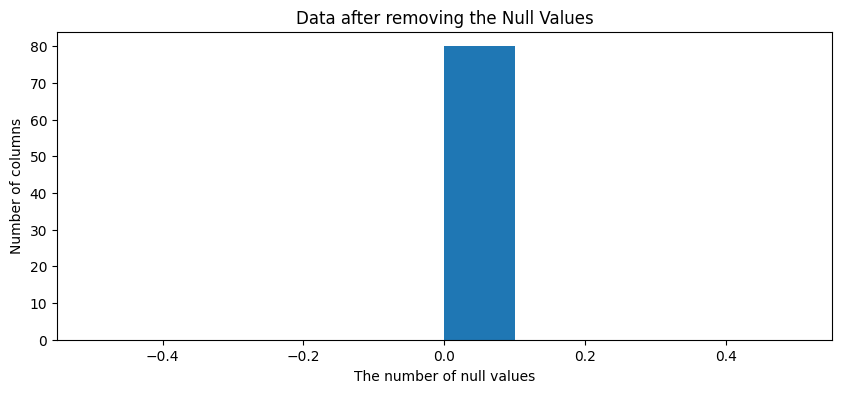

In [ ]:
#Plot data after removing the null values
plt.figure(1,figsize=(10,4))
plt.hist(data_f.isna().sum())

plt.title('Data after removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')
plt.show()

In [ ]:
(data_f.dtypes == 'object')

Dst Port         False
Protocol         False
Timestamp         True
Flow Duration    False
Tot Fwd Pkts     False
                 ...  
Idle Mean        False
Idle Std         False
Idle Max         False
Idle Min         False
Label             True
Length: 80, dtype: bool

In [ ]:
#Categorical values in the 'Label' column are converted to numerical values
data_f['Label'] = data_f['Label'].map({'Benign' : 0, 'Bot':1})

<ipython-input-14-e7645fca567e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'Benign' : 0, 'Bot':1})


In [ ]:
#Find the number of Benign class and Bot class
def count_classes_as_dict(dataframe, column_name):
    class_counts = dataframe[column_name].value_counts().to_dict()
    return class_counts
class_counts_dict = count_classes_as_dict(data_f, 'Label')
print(class_counts_dict)

{0: 759826, 1: 286191}


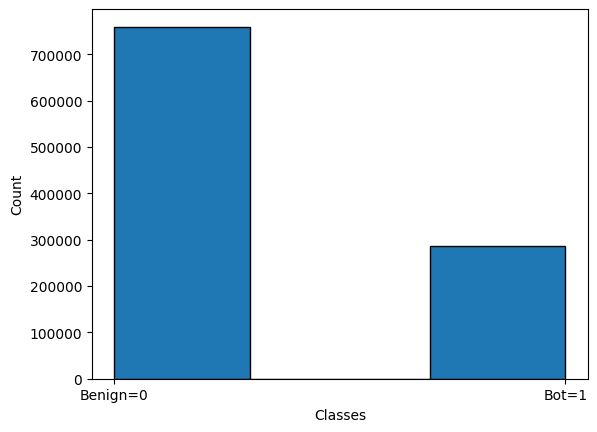

In [ ]:
#Plot the number of classes
plt.hist(data_f['Label'], bins = [0, 0.3, 0.7, 1], edgecolor='black')
plt.xticks([0,1], labels = ['Benign=0', 'Bot=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

Data Exploring

In [ ]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.423429e+03,8.049848e+00,1.151421e+07,5.887282e+00,6.983180e+00,3.920838e+02,5.271275e+03,2.104312e+02,8.249200e+00,5.461640e+01,...,2.044231e+00,1.745403e+01,1.229579e+05,6.130972e+04,1.905231e+05,8.305446e+04,4.781197e+06,1.064224e+05,4.863777e+06,4.677017e+06
std,1.516176e+04,4.432629e+00,3.012113e+07,8.903317e+01,2.129580e+02,2.159779e+03,3.088768e+05,2.669497e+02,2.094972e+01,5.762840e+01,...,1.392463e+01,5.179526e+00,2.083099e+06,1.261694e+06,2.761456e+06,1.759832e+06,1.741308e+07,1.462605e+06,1.756808e+07,1.733303e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,5.160000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.389000e+03,6.000000e+00,1.124200e+04,3.000000e+00,1.000000e+00,6.300000e+01,1.290000e+02,4.600000e+01,0.000000e+00,4.000000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.080000e+03,6.000000e+00,2.210150e+06,7.000000e+00,5.000000e+00,3.650000e+02,5.820000e+02,3.260000e+02,0.000000e+00,1.086667e+02,...,3.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.010000e+08,1.711000e+03,1.460000e+03,1.460000e+03,...,9.262000e+03,4.400000e+01,1.110000e+08,7.490000e+07,1.110000e+08,1.110000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


Data Splitting into Train and Test

In [ ]:
pd.set_option('use_inf_as_na', True)

In [ ]:
n_values=data_f.isnull().sum()
print(n_values)

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64


In [ ]:
data_n = data_f.drop('Timestamp', axis=1)

In [ ]:
X = data_n.drop('Label', axis=1)
y = data_n['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [ ]:
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

**Training** **the** **Model**

In [ ]:
#Random Forest Model

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

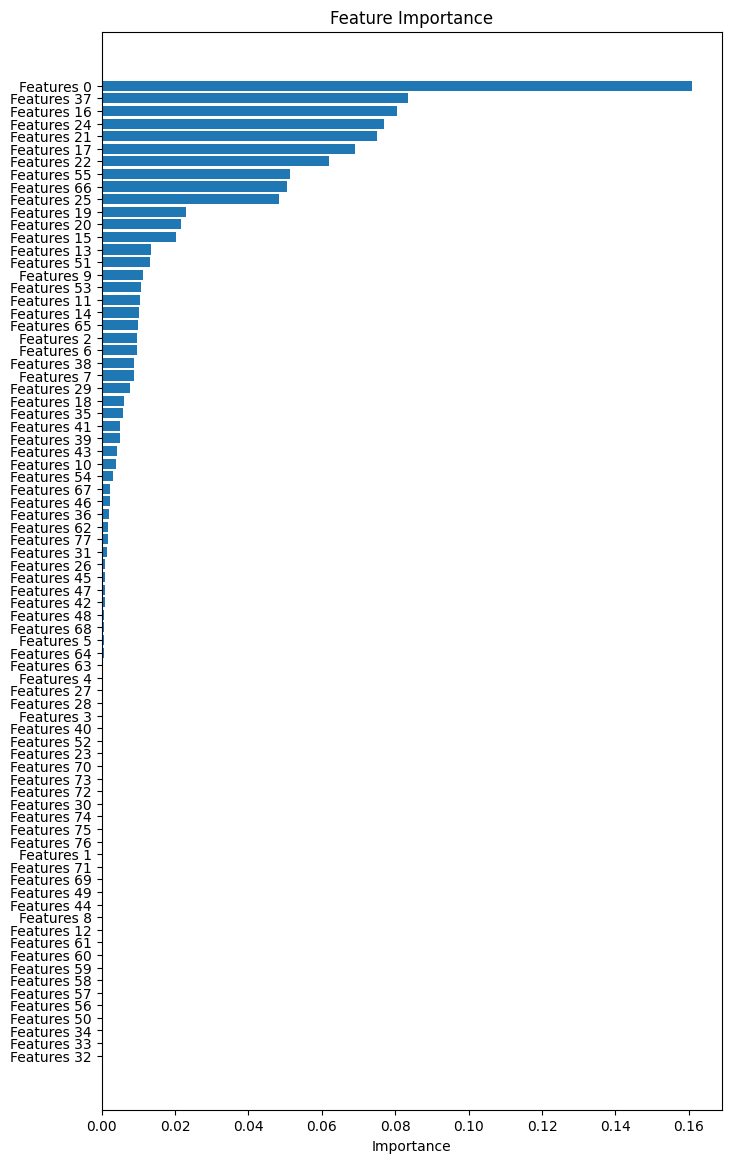

In [ ]:
#Feature importances from the trained model
importances = rf_model.feature_importances_

indices = sorted(range(len(importances)), key = lambda i: importances[i],reverse = False)
feature_names = [f"Features {i}" for i in indices]

plt.figure(figsize=(8,14))
plt.barh(range(X_train.shape[1]), importances[indices], align = "center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

Model Evaluation

In [ ]:
#Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

In [ ]:
#Evaluate Random Forest
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test,rf_pred)

In [ ]:
#Results of Random Forest Model
print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 0.9999


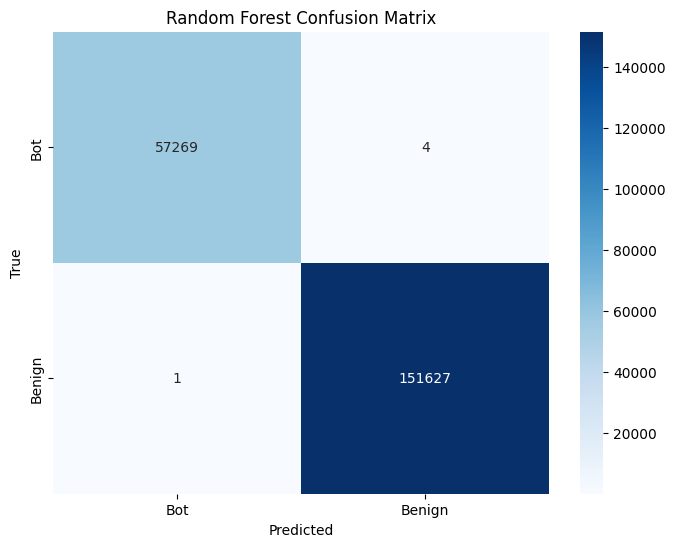

In [ ]:
#Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'Bot'], 'Random Forest Confusion Matrix')

In [ ]:
#Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Evaluate Linear Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.8754
F1 Score: 0.7316
Precision: 0.8931
Recall: 0.6196


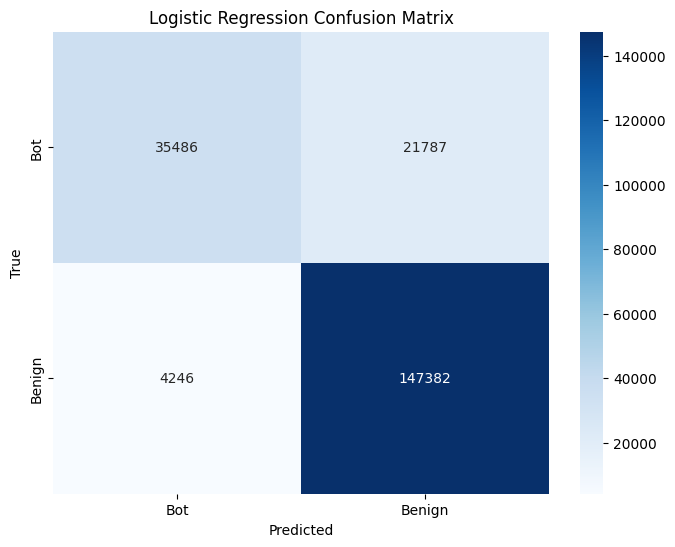

In [ ]:
#Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'Bot'], 'Logistic Regression Confusion Matrix')